In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data=pd.read_csv("/content/iris.csv")

In [4]:
print(data.shape)

(150, 6)


In [ ]:
print(data.describe())

       Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count  150.000000    150.000000   150.000000    150.000000   150.000000
mean    75.500000      5.843333     3.057333      3.758000     1.199333
std     43.445368      0.828066     0.435866      1.765298     0.762238
min      1.000000      4.300000     2.000000      1.000000     0.100000
25%     38.250000      5.100000     2.800000      1.600000     0.300000
50%     75.500000      5.800000     3.000000      4.350000     1.300000
75%    112.750000      6.400000     3.300000      5.100000     1.800000
max    150.000000      7.900000     4.400000      6.900000     2.500000


In [ ]:
print(data.isna().sum())
print(data.describe())

Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64
       Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count  150.000000    150.000000   150.000000    150.000000   150.000000
mean    75.500000      5.843333     3.057333      3.758000     1.199333
std     43.445368      0.828066     0.435866      1.765298     0.762238
min      1.000000      4.300000     2.000000      1.000000     0.100000
25%     38.250000      5.100000     2.800000      1.600000     0.300000
50%     75.500000      5.800000     3.000000      4.350000     1.300000
75%    112.750000      6.400000     3.300000      5.100000     1.800000
max    150.000000      7.900000     4.400000      6.900000     2.500000


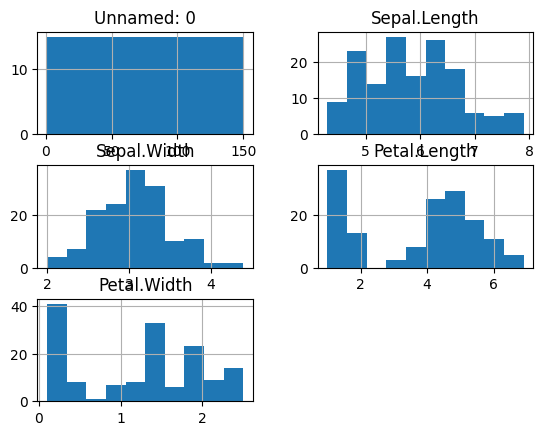

In [11]:
data.hist()
plt.show()

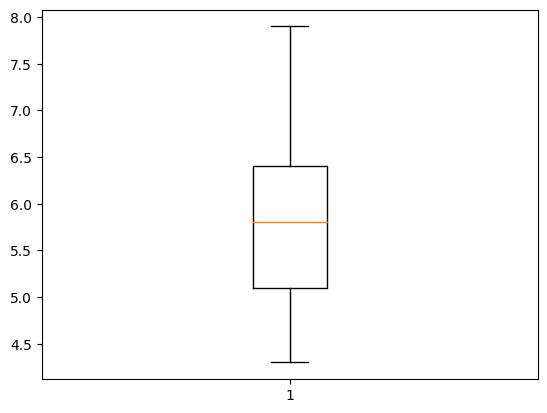

In [8]:
plt.boxplot([iris['Sepal.Length']])
plt.show()

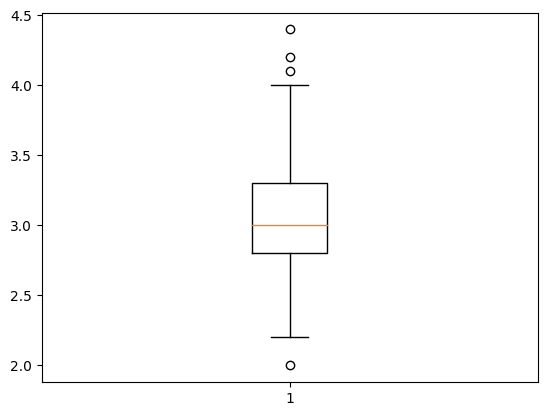

In [9]:
plt.boxplot([iris['Sepal.Width']])
plt.show()

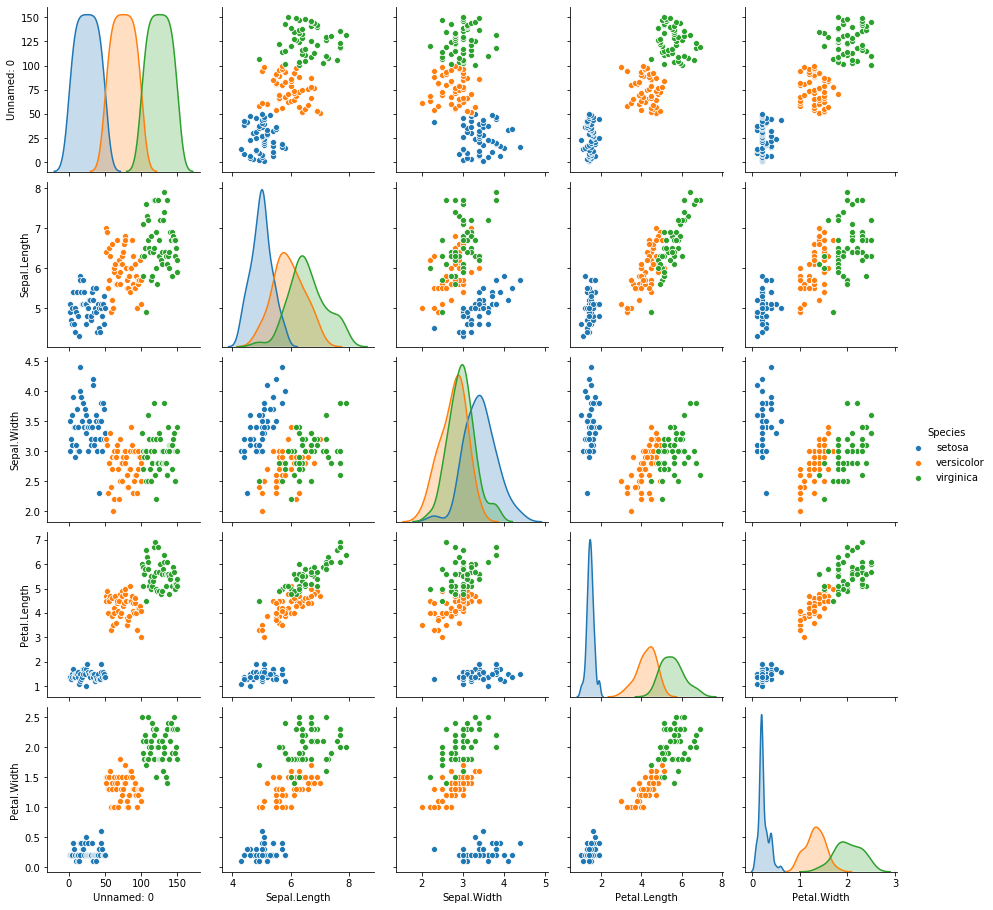

In [ ]:
sns.pairplot(iris,hue='Species');

<ipython-input-12-2a956d4b1476>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig=sns.heatmap(iris.corr(),annot=True)


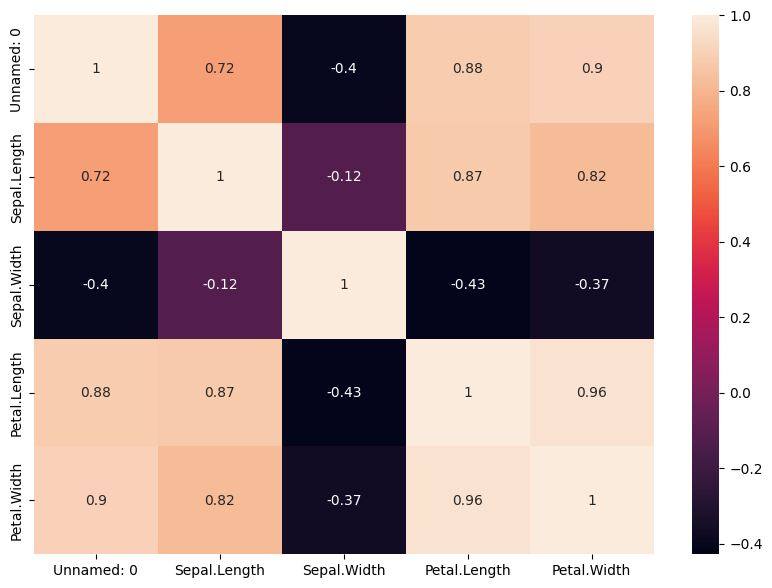

In [12]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(iris.corr(),annot=True)

In [13]:
X = data['Sepal.Length'].values.reshape(-1,1)
Y = iris['Sepal.Width'].values.reshape(-1,1)

In [14]:
correlation = data.corr()
print(correlation)

              Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Unnamed: 0      1.000000      0.716676    -0.402301      0.882637     0.900027
Sepal.Length    0.716676      1.000000    -0.117570      0.871754     0.817941
Sepal.Width    -0.402301     -0.117570     1.000000     -0.428440    -0.366126
Petal.Length    0.882637      0.871754    -0.428440      1.000000     0.962865
Petal.Width     0.900027      0.817941    -0.366126      0.962865     1.000000


<ipython-input-14-a7a07ad89263>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [18]:
train, test = train_test_split(data, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 6)
(38, 6)


In [19]:
train_X = train[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
train_y = train.Species

test_X = test[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
test_y = test.Species

In [20]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 0.9736842105263158


In [21]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(test_y,pred_y))

Acc= 0.9736842105263158


In [22]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred2))

Accuracy Score: 0.9736842105263158


In [23]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(train_X,train_y)
y_pred3 = model3.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred3))

Accuracy Score: 0.9736842105263158


In [24]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred4))

Accuracy Score: 0.9736842105263158


In [26]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.947,0.947,0.947,0.947,0.921]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.947,Logistic Regression
0.947,Support Vector Machines
0.947,Naive Bayes
0.947,KNN
0.921,Decision Tree
